## 4.4 PCA Autoencoder

In [1]:
import os
os.chdir('./../../')
from models.Autoencoders.pca_autoencoder import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('./data/external/fashion_mnist/fashion-mnist_train.csv')  # Update the path as needed
test_data = pd.read_csv('./data/external/fashion_mnist/fashion-mnist_test.csv')    # Update the path as needed

# Separate features and labels
x_train = train_data.drop(columns=['label']).values.reshape(-1, 28, 28)  # Reshape to (num_samples, 28, 28)
y_train = train_data['label'].values

x_test = test_data.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_data['label'].values

# Normalize the images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 

# Split the training data into train, val, and test sets (70:10:20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# Flatten the images (28x28 -> 784)
x_train_flattened = x_train.reshape(-1, 28*28)
x_val_flattened = x_val.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)

# Normalize pixel values to the range [0, 1]
x_train_flattened /= 255.0
x_val_flattened /= 255.0
x_test_flattened /= 255.0

Training set shape: (42000, 28, 28) (42000,)
Validation set shape: (18000, 28, 28) (18000,)
Test set shape: (10000, 28, 28) (10000,)


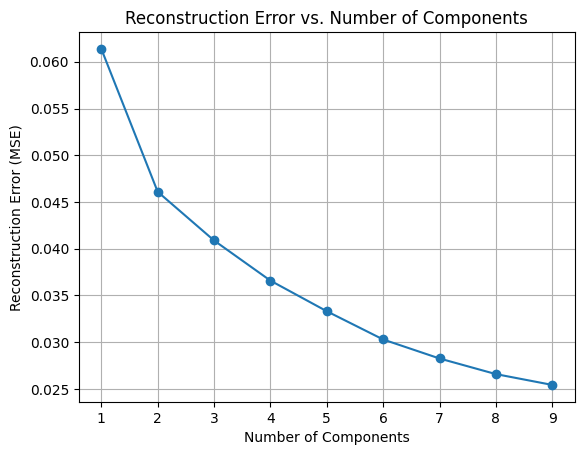

In [12]:

# Split the training data into train, val sets
x_test = x_test_flattened
x_train = x_train_flattened
x_val = x_val_flattened
# Define a function to calculate Mean Squared Error (MSE) between original and reconstructed images
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Step 4: Evaluate reconstruction error for different number of components (from 1 to 100)
mse_errors = []
for n_components in range(1, 10):
    # Initialize and train the PCA Autoencoder
    pca_autoencoder = PcaAutoencoder(n_components=n_components)
    pca_autoencoder.fit(x_train)
    
    # Encode and reconstruct the validation set
    x_val_encoded = pca_autoencoder.encode(x_val)
    x_val_reconstructed = pca_autoencoder.forward(x_val_encoded)
    
    # Calculate MSE (reconstruction error)
    mse_error = calculate_mse(x_val, x_val_reconstructed)
    mse_errors.append(mse_error)

# Step 5: Plot the elbow curve of Reconstruction error v/s Number of Components
plt.plot(range(1, 10), mse_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()


# # Fit PCA with all components to get the cumulative explained variance
# pca_autoencoder_full = PcaAutoencoder()
# pca_autoencoder_full.fit(x_train)



### K_optimal =6

## Vizualize

Reconstruction MSE (koptimal=6): 0.030289883738129627


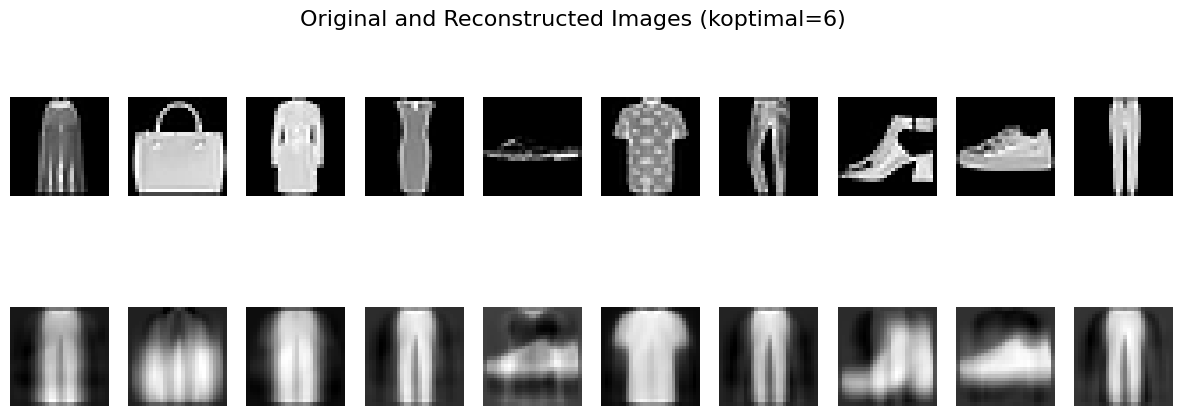

In [17]:
# Step 1: Train the PCA Autoencoder with koptimal = 6
koptimal = 6

# Initialize and train the PCA Autoencoder
pca_autoencoder = PcaAutoencoder(n_components=koptimal)
pca_autoencoder.fit(x_train)

# Step 2: Encode and reconstruct the validation set
x_val_encoded = pca_autoencoder.encode(x_val)
x_val_reconstructed = pca_autoencoder.forward(x_val_encoded)

# Step 3: Calculate the reconstruction error (MSE) for the validation set
mse_error = calculate_mse(x_val, x_val_reconstructed)
print(f'Reconstruction MSE (koptimal={koptimal}):', mse_error)

# Step 4: Visualize original and reconstructed images (from validation set)
# Select a few sample images to visualize
sample_indices = np.random.choice(x_val.shape[0], 10, replace=False)
original_images = x_val[sample_indices]
reconstructed_images = x_val_reconstructed[sample_indices]

# Plot the original and reconstructed images side by side
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i in range(10):
    # Original images
    axes[0, i].imshow(original_images[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    # Reconstructed images
    axes[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

plt.suptitle(f'Original and Reconstructed Images (koptimal={koptimal})', fontsize=16)
plt.show()


## Compare PCA with CNN and MLP

CNN Autoencoders outperform both PCA and MLP autoencoders in image reconstruction, providing the lowest reconstruction MSE, faster convergence, and better handling of spatial dependencies through convolutional layers.

PCA Autoencoders are computationally efficient for dimensionality reduction but result in blurry and less detailed reconstructions, with a higher reconstruction MSE compared to CNNs and MLPs.

MLP Autoencoders show moderate performance with slower convergence and higher reconstruction error, making them less effective than CNN autoencoders for image data tasks.



## 4.5 KNN Classification ipynb file